# Breast Cancer Prediction

**Breast Cancer Prediction** is a classification task aimed at predicting the diagnosis of a breast mass as either malignant or benign. The dataset used for this prediction consists of features computed from a digitized image of a fine needle aspirate (FNA) of the breast mass. These features describe various characteristics of the cell nuclei present in the image.

The dataset contains the following information for each instance:

1. ID number: A unique identifier for each sample.
2. Diagnosis: The target variable indicating the diagnosis, where 'M' represents malignant and 'B' represents benign.

For each cell nucleus, ten real-valued features are computed, which are:

1. Radius: The mean distance from the center to points on the perimeter of the nucleus.
2. Texture: The standard deviation of gray-scale values in the nucleus.
3. Perimeter: The perimeter of the nucleus.
4. Area: The area of the nucleus.
5. Smoothness: A measure of local variation in radius lengths.
6. Compactness: Computed as the square of the perimeter divided by the area minus 1.0.
7. Concavity: Describes the severity of concave portions of the nucleus contour.
8. Concave points: Represents the number of concave portions of the nucleus contour.
9. Symmetry: Measures the symmetry of the nucleus.
10. Fractal dimension: This feature approximates the "coastline" of the nucleus, using the concept of fractal geometry.

These features provide quantitative measurements that can be used to assess the characteristics of cell nuclei and aid in distinguishing between malignant and benign breast masses. By training a machine learning model on this dataset, it is possible to develop a predictive model that can assist in the early detection and diagnosis of breast cancer.

In [30]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing the dataset
df = pd.read_csv('Breast_Cancer_Data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Preprocessing Part 1

In [3]:
# dropping unnecessary columns
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [4]:
# the dimensionality of the datset
df.shape

(569, 31)

In [5]:
#checking the data types of the columns
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [6]:
#checking for the missing values
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
# assesing the pressence of duplicated values
df.duplicated().sum()

0

In [8]:
# checking the data description
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Exploratory Data Analysis

In [9]:
df.diagnosis.sample(8)

395    B
496    B
379    M
65     M
17     M
75     M
172    M
188    B
Name: diagnosis, dtype: object

In [10]:
df.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<AxesSubplot:>

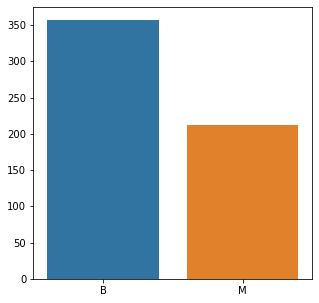

In [11]:
# bar plot for the number of diagnosis
plt.figure(figsize=(5,5))
sns.barplot(x=df['diagnosis'].value_counts().index,y=df['diagnosis'].value_counts().values)


<AxesSubplot:>

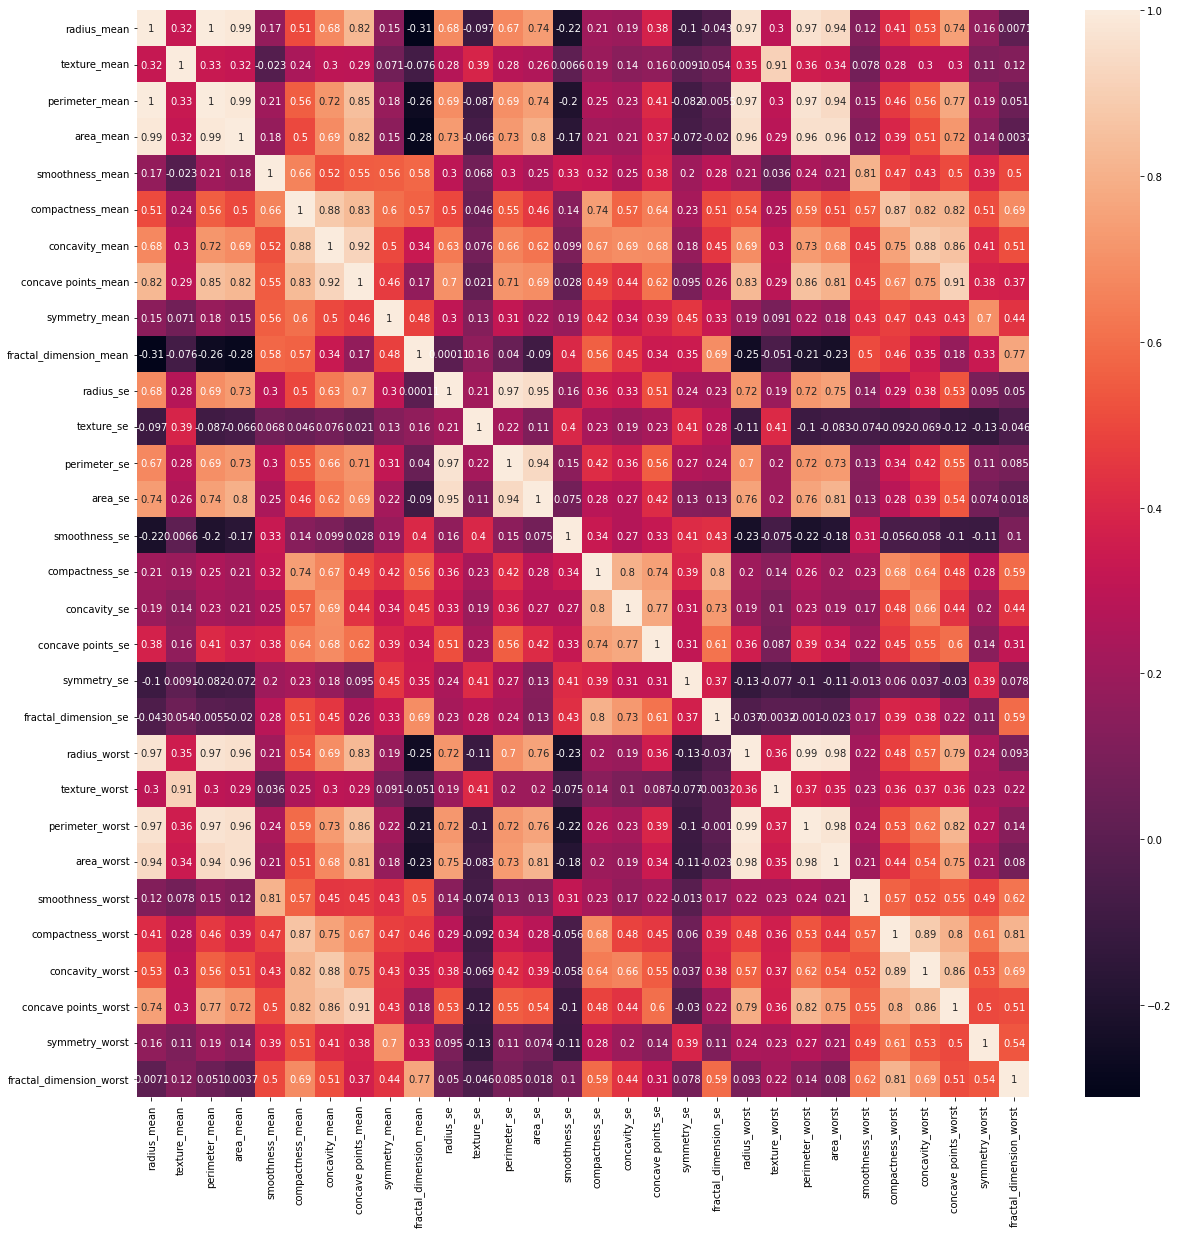

In [12]:
# create a heatmap to check the correlation
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [13]:
df.columns[1:]

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

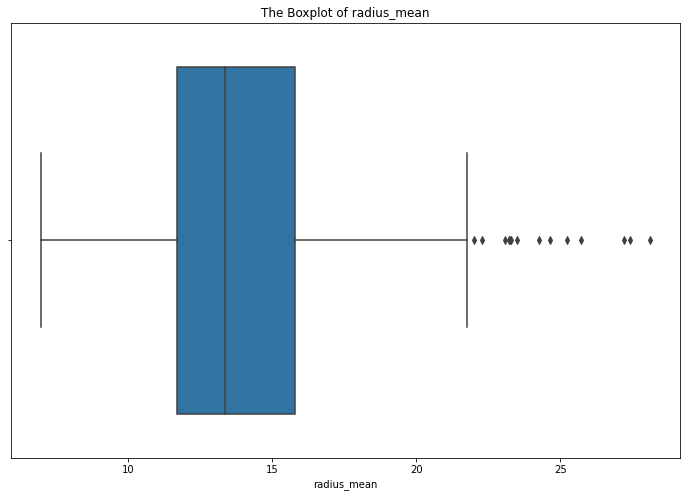

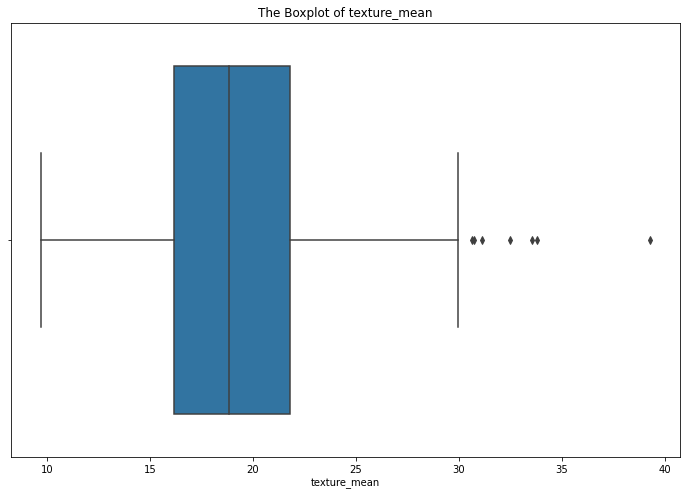

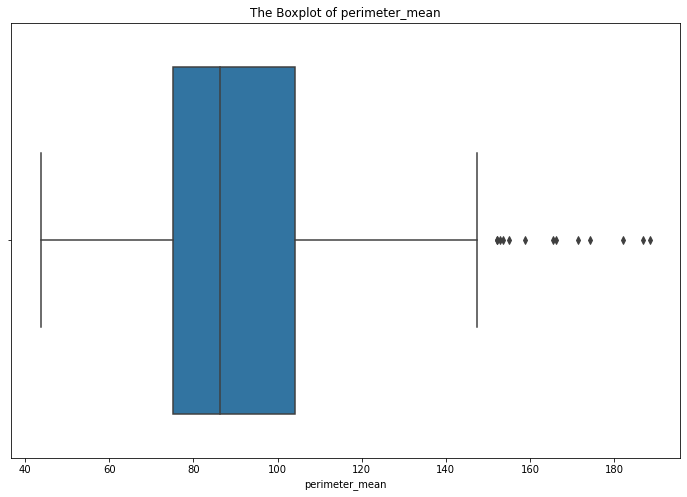

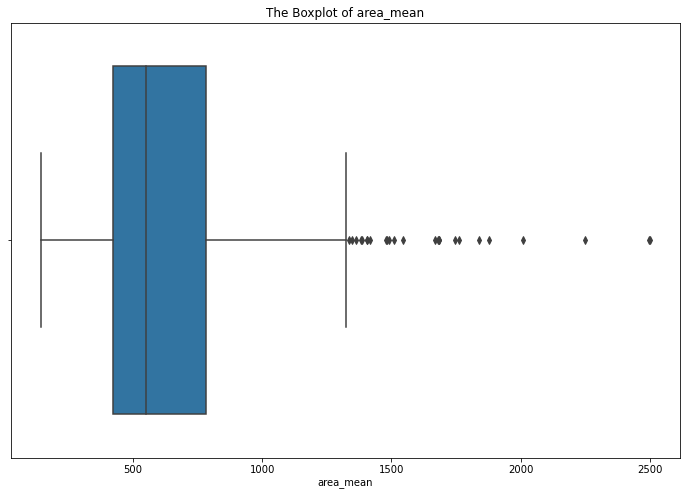

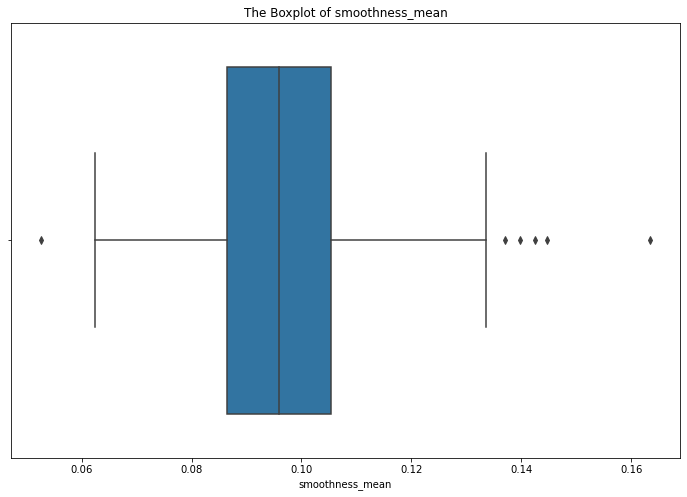

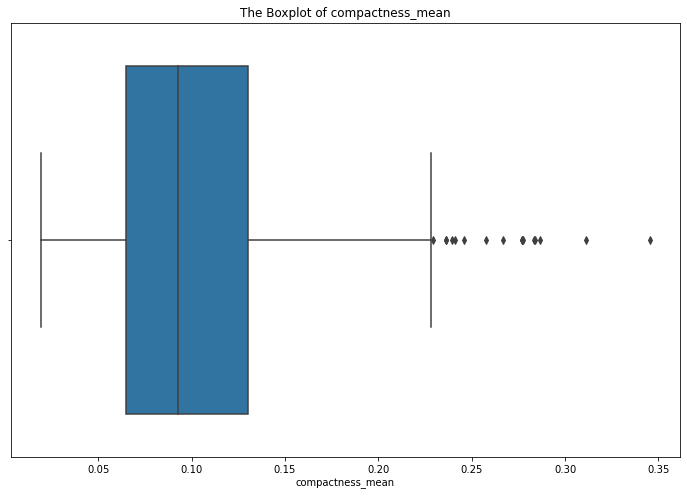

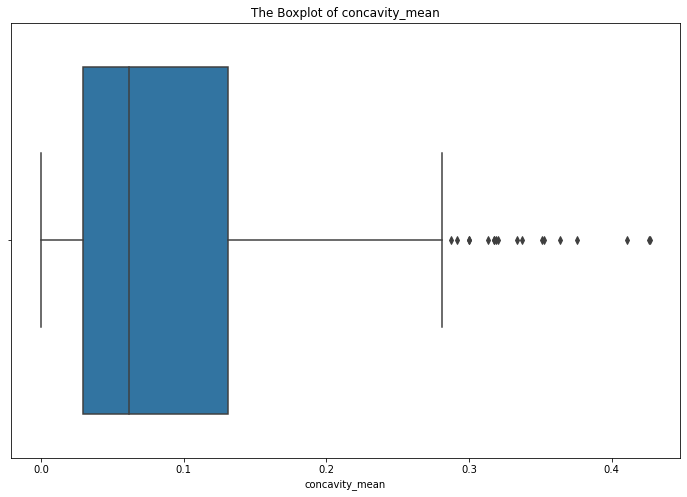

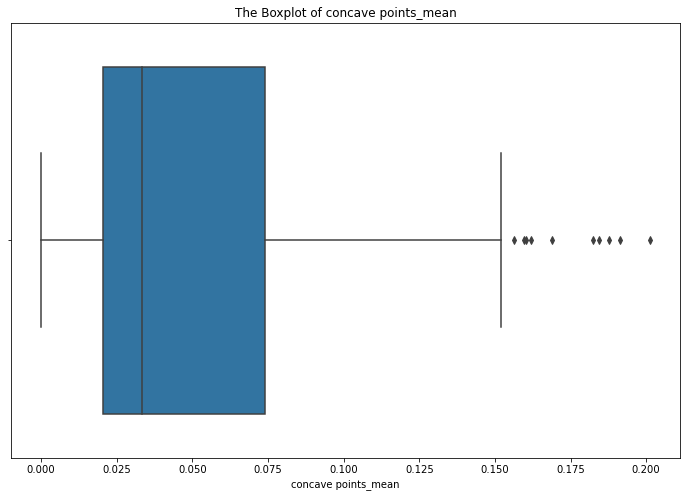

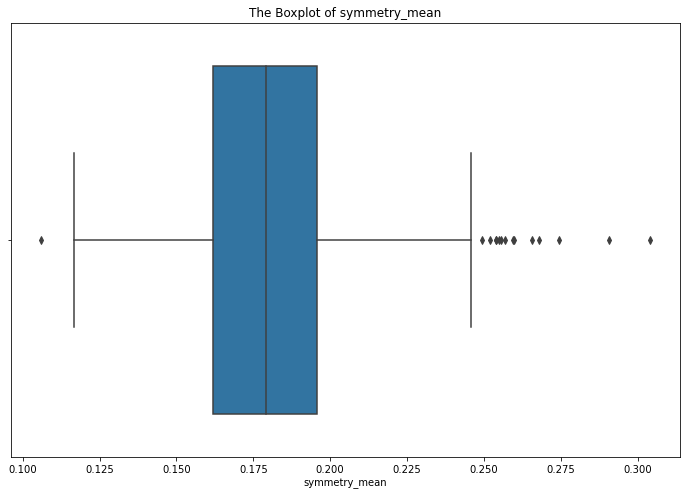

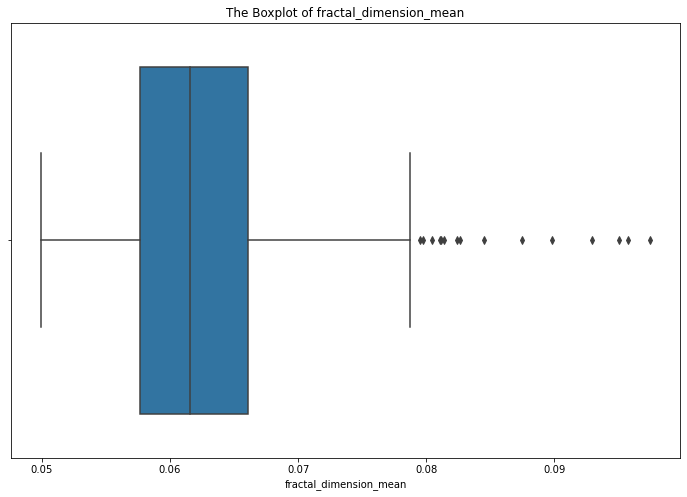

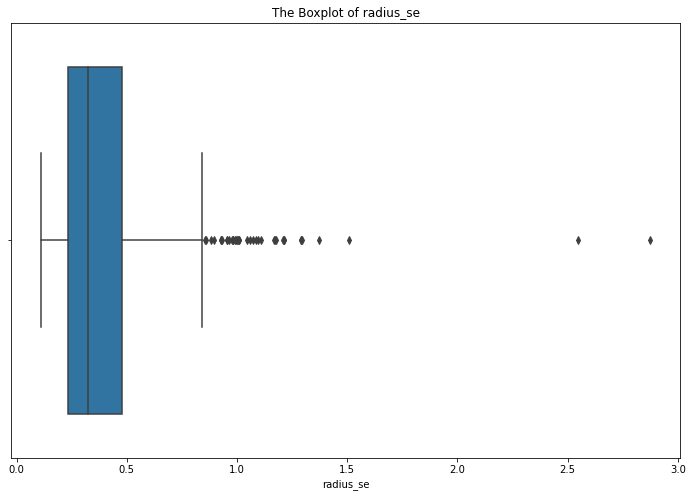

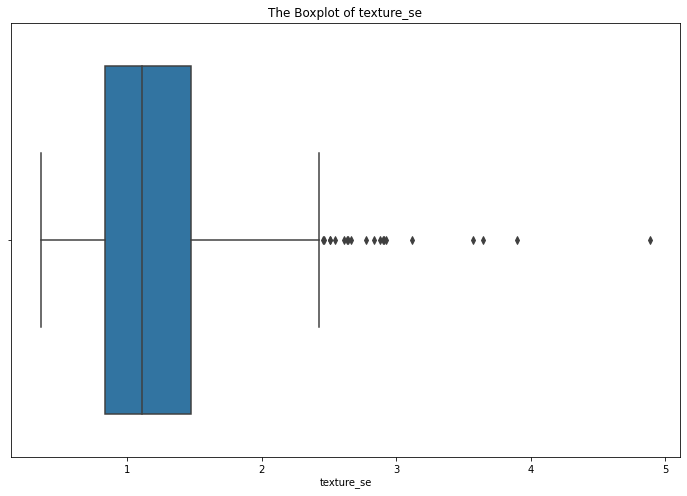

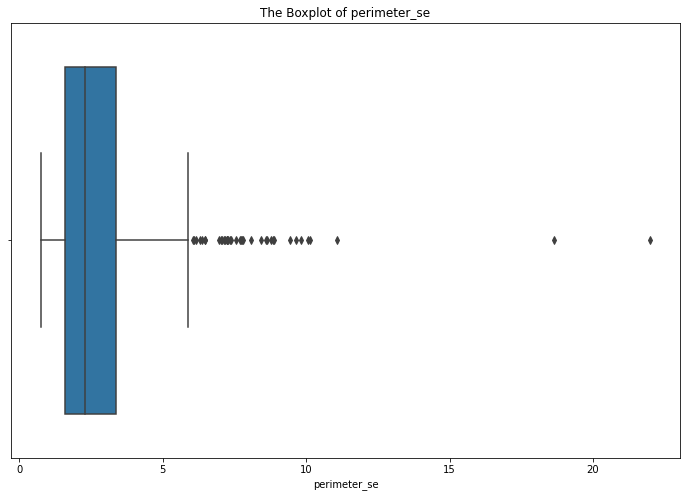

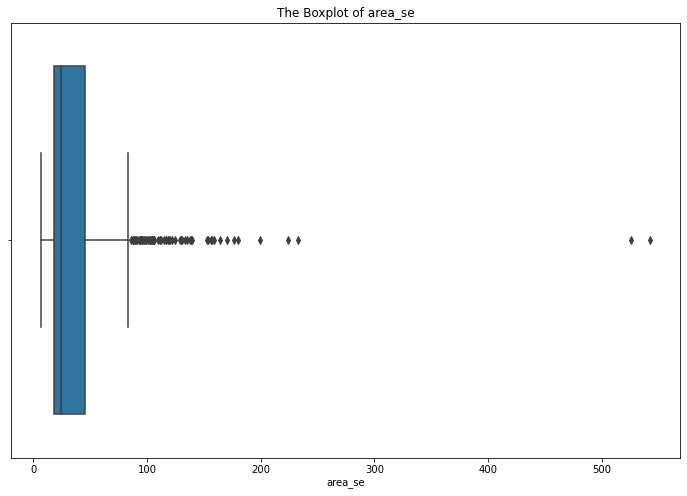

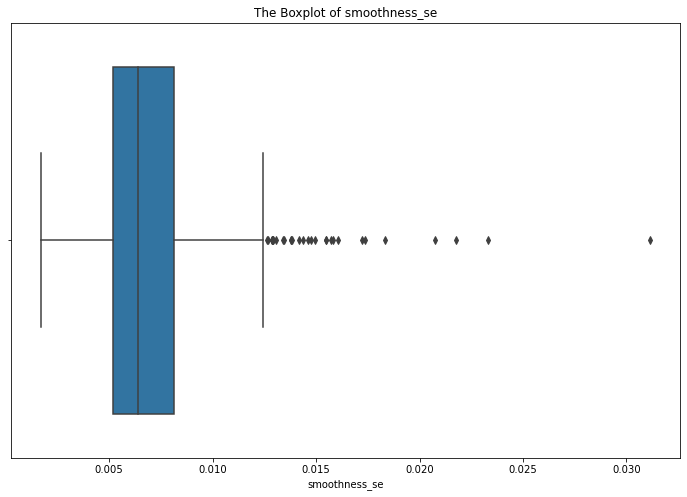

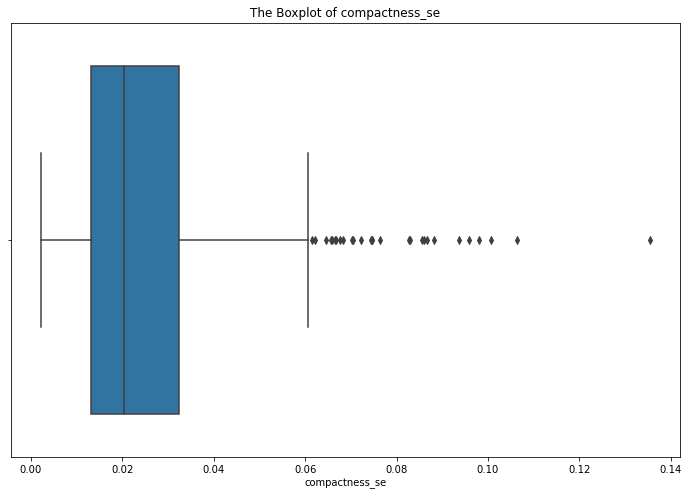

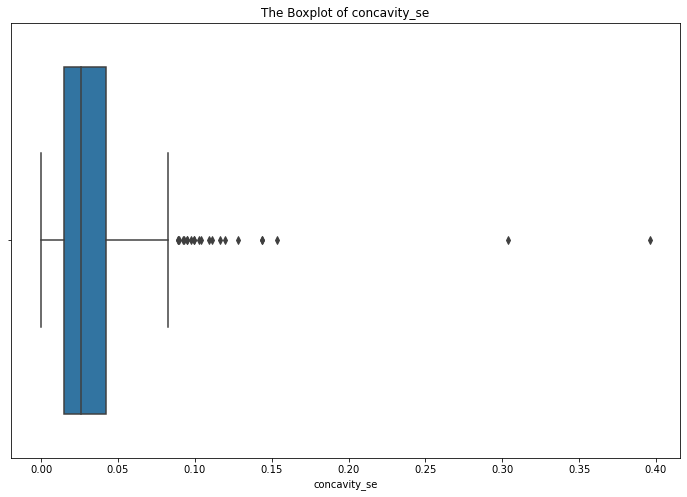

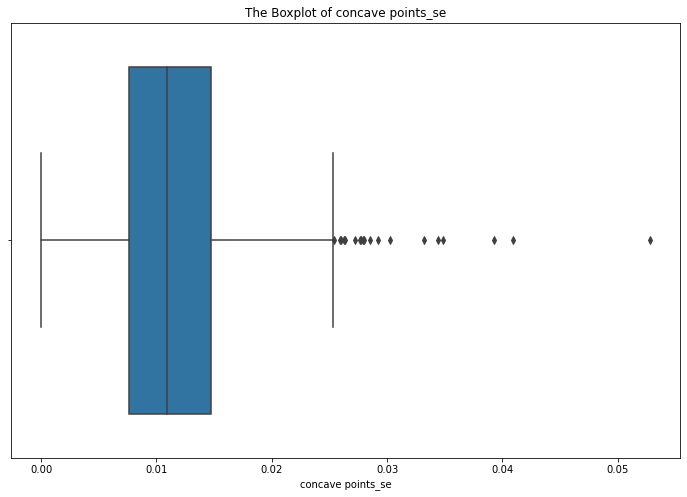

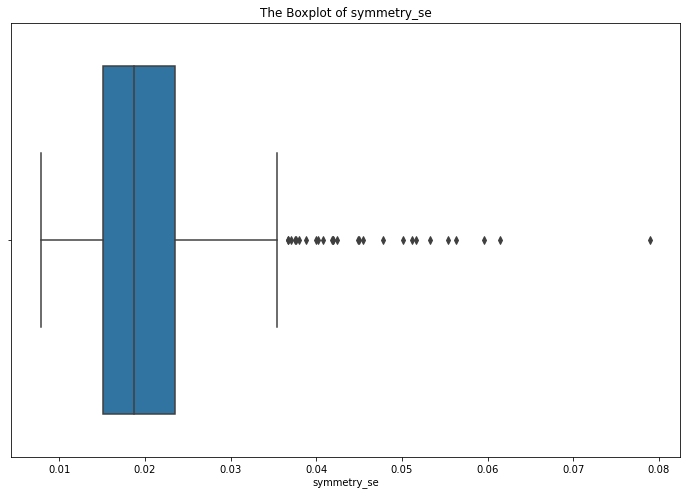

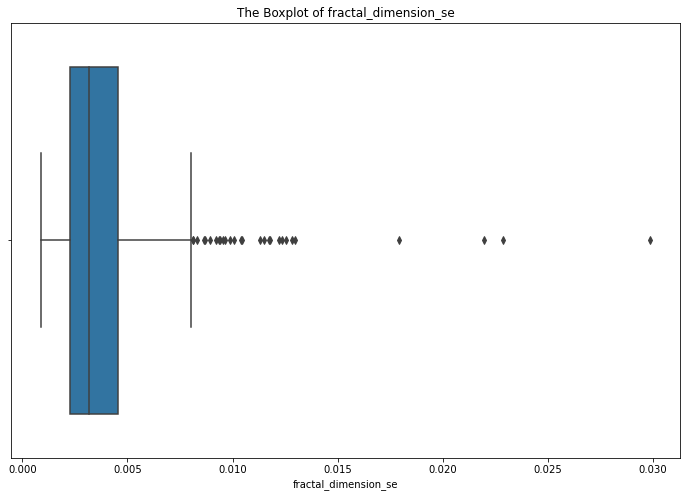

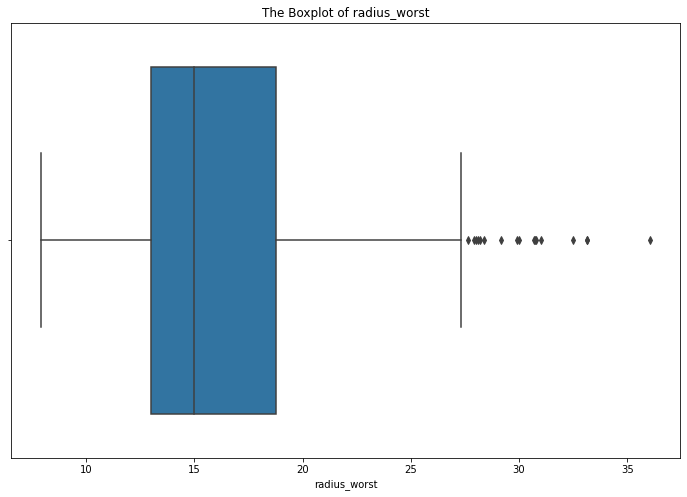

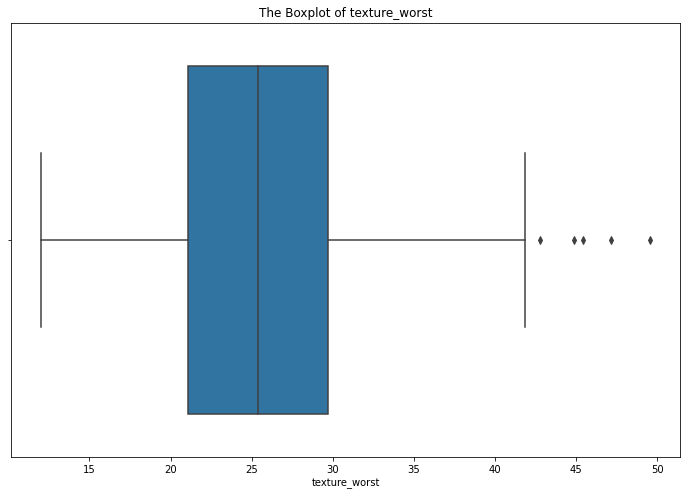

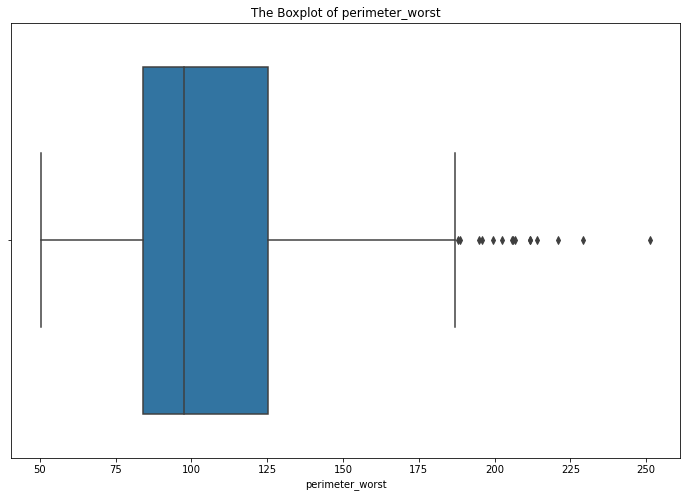

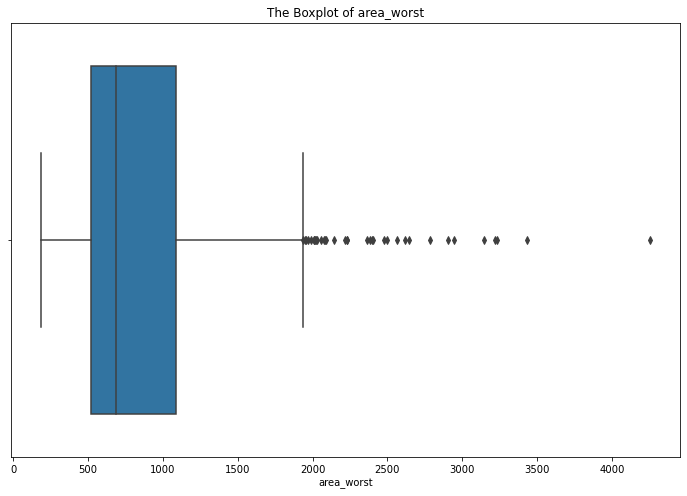

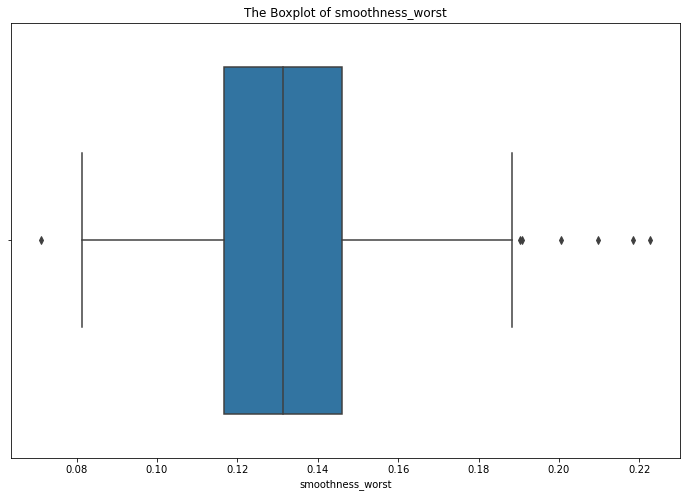

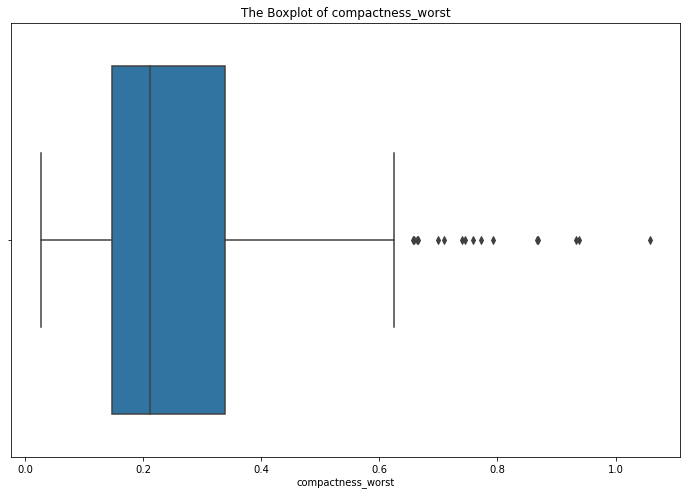

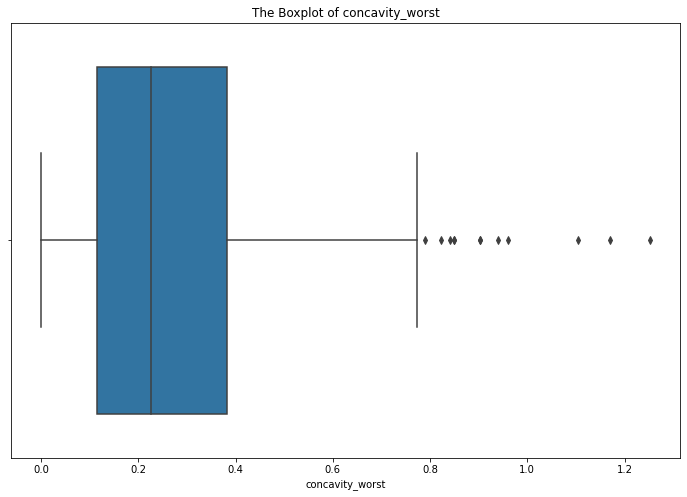

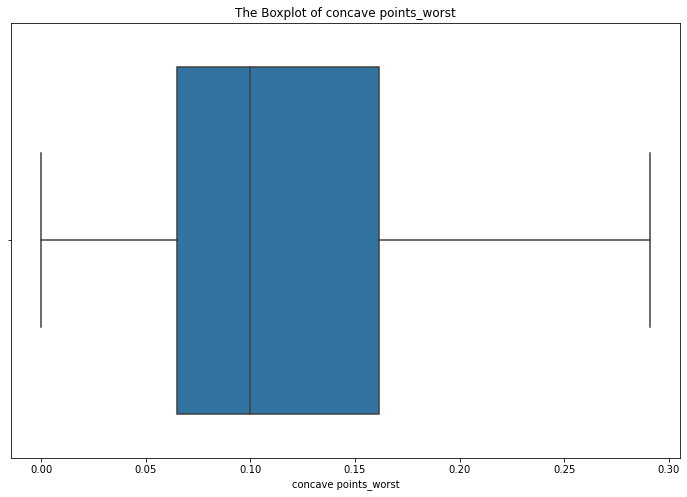

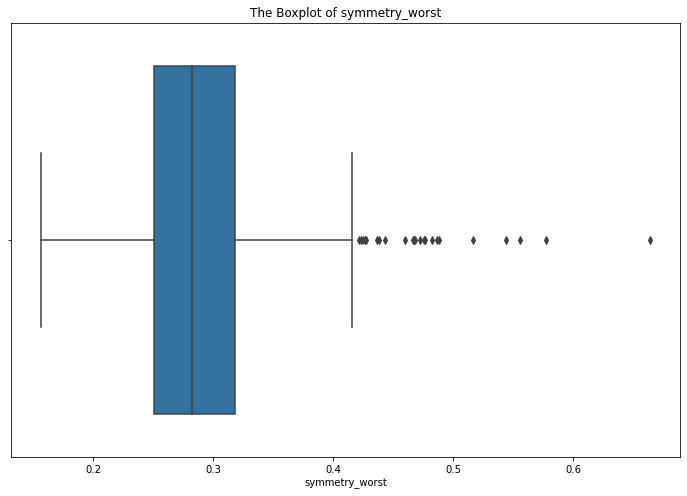

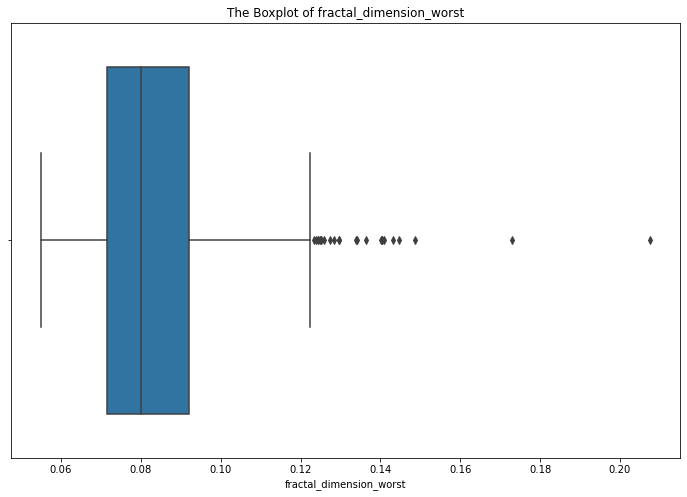

In [14]:
columns = df.columns[1:]

for column in columns:
    plt.figure(figsize=(12,8))
    sns.boxplot(x = column, data = df)
    plt.title(f"The Boxplot of {column}")
    plt.xlabel(column)
    plt.show()
    

## Multicolinearity Analysis and Removal

Eliminating multicollinearity among variables results in the retention of independent variables, with their corresponding Variance Inflation Factor (VIF) scores being less than 5. These remaining variables can serve as valuable guides during the data collection process and become powerful tools in the effective deployment of predictive models.

In [15]:
# creating a copy of the originall data
df1 = df.copy()

In [16]:
# transforming the diagnosis column to an integer datatype and mapping its values with numerical ones
map_value = {"M": 1, "B": 0}

df1["diagnosis"] = df1["diagnosis"].map(map_value)

df1.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [17]:
# importing libraries for assesing the degree of multicolinearity amongst the variable
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
# function for tabulating the score of multicolinearity of aeach column in descending order
def calc_vif(x):
    vif=pd.DataFrame()
    vif['column']=x.columns
    vif['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    # Sort the DataFrame by 'vif' column in descending order
    vif = vif.sort_values(by='vif', ascending=False)
    return vif

# function to iterate the drop in the columns with the highest variance enflation factor score 
# iterates the conditional loop untill the highest vif score is less or equal to 5 and outputs the resulting data

def drop_high_vif_columns(df, threshold=5):
    while True:
        vif_result = calc_vif(df)
        highest_vif_column = vif_result.iloc[0]['column']
        highest_vif_value = vif_result.iloc[0]['vif']
        
        if highest_vif_value > threshold:
            print(f"Dropping column '{highest_vif_column}' with VIF {highest_vif_value:.2f}")
            df = df.drop(columns=highest_vif_column)
        else:
            print("VIF condition satisfied. Stopping the process.")
            break

    return df

In [19]:
# exploring the columns dropped and the vif score they had
final_df = drop_high_vif_columns(df1)

Dropping column 'radius_mean' with VIF 63787.23
Dropping column 'radius_worst' with VIF 7739.62
Dropping column 'perimeter_mean' with VIF 3905.27
Dropping column 'perimeter_worst' with VIF 670.24
Dropping column 'fractal_dimension_mean' with VIF 537.82
Dropping column 'smoothness_worst' with VIF 368.12
Dropping column 'texture_worst' with VIF 312.12
Dropping column 'fractal_dimension_worst' with VIF 186.04
Dropping column 'symmetry_worst' with VIF 170.33
Dropping column 'concavity_mean' with VIF 142.34
Dropping column 'radius_se' with VIF 110.22
Dropping column 'concave points_worst' with VIF 101.96
Dropping column 'smoothness_mean' with VIF 89.30
Dropping column 'compactness_mean' with VIF 78.63
Dropping column 'area_mean' with VIF 68.12
Dropping column 'compactness_worst' with VIF 49.06
Dropping column 'perimeter_se' with VIF 44.02
Dropping column 'symmetry_mean' with VIF 39.00
Dropping column 'texture_mean' with VIF 23.71
Dropping column 'concave points_se' with VIF 18.23
Dropping c

In [20]:
# the column with the independent variables
final_df

,diagnosis,texture_se,area_se,concavity_se
0,1,0.9053,153.40,0.05373
1,1,0.7339,74.08,0.01860
2,1,0.7869,94.03,0.03832
3,1,1.1560,27.23,0.05661
4,1,0.7813,94.44,0.05688
...,...,...,...,...
564,1,1.2560,158.70,0.05198
565,1,2.4630,99.04,0.03950
566,1,1.0750,48.55,0.04730
567,1,1.5950,86.22,0.07117


## Train Test Split

In [21]:
# separating the dependent and the independent variabbles for model development
x = df1.drop(['diagnosis'],axis=1)
y = df1['diagnosis']

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

## Deploying Different Models

In [23]:
# function to get the score of each model and sort the scores in descending order
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier()]
scores = []

for model in models:
    model.fit(x_train, y_train)
    model_score = model.score(x_test, y_test)
    scores.append((model, model_score))

# Sort the scores in descending order
scores.sort(key=lambda x: x[1], reverse=True)

# Print the scores
for model, score in scores:
    print(f"{model.__class__.__name__}: {score}")


C:\Users\owino\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression: 0.9649122807017544
RandomForestClassifier: 0.9649122807017544
DecisionTreeClassifier: 0.9385964912280702


In [31]:
# using other samples to assess the score of the top perfoming model
# Shuffle Split Method
from sklearn.model_selection import ShuffleSplit, KFold
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size = 0.2, random_state = 10)

cross_val_score(LogisticRegression(), x, y, cv = cv)

array([0.92982456, 0.96491228, 0.95614035, 0.97368421, 0.93859649])

In [29]:
# K-fold Method
kv = KFold(n_splits = 5, shuffle = True, random_state = 42)

cross_val_score(LogisticRegression(), x, y, cv = kv)

C:\Users\owino\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\owino\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.96491228, 0.96491228, 0.89473684, 0.97368421, 0.92035398])

In [32]:
# evaluating the perfomance of a sample of teh model created
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
#predicting the diagnosis
y_pred = logreg.predict(x_test)

In [33]:
# printing samples from predicted and actual values with the
# the actual values are masked as such, 1 represents 'M' and 0 is 'B'
print('Predicted values: ',y_pred[:10])
print('Actual values: ',y_test[:10])

Predicted values:  [0 1 1 0 0 1 1 1 0 0]
Actual values:  204    0
70     1
131    1
431    0
540    0
567    1
369    1
29     1
81     0
477    0
Name: diagnosis, dtype: int64


## Conclusion


The data was found to be quite clean, without any null values or duplicates. However, a challenge emerged as many variables contained outliers. Removing these outliers was deemed inappropriate due to the already small size of the dataset. Eliminating outliers could have further reduced the data, leading to an unreliable and biased model.

In light of this, the multicollinearity analysis played a crucial role in identifying the core variables that significantly influenced the project's outcomes. Among the four variables analyzed, namely diagnosis, texture_se, area_se, and concavity_se, it became evident that they hold clinical importance and strongly impact the success or failure of the model.

During the model deployment analysis, the Logistic Regression model and Random Forest Classifier demonstrated superior performance compared to other models assessed. Achieving a similar high accuracy score of 0.9649 and maintaining a consistent cross-validation score, the project can be considered a success.